# Water Potability Prediction Using Machine Learning

## I. Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report

## II. Importing and understanding our dataset 

In [2]:
df = pd.read_csv("train.csv")

### Printing the head of the data 

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Printing the tail of the data 

In [4]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


## III. Getting the information 

### Shape of Our Dataset (Number of Rows And Number of Columns)

In [5]:
df.shape

(2000, 21)

### Basic Information of our Dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### Statistics about the Dataset

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


## IV. Data Pre-Preparation

### Checking null values in the Dataset

In [8]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### Handling Outliers

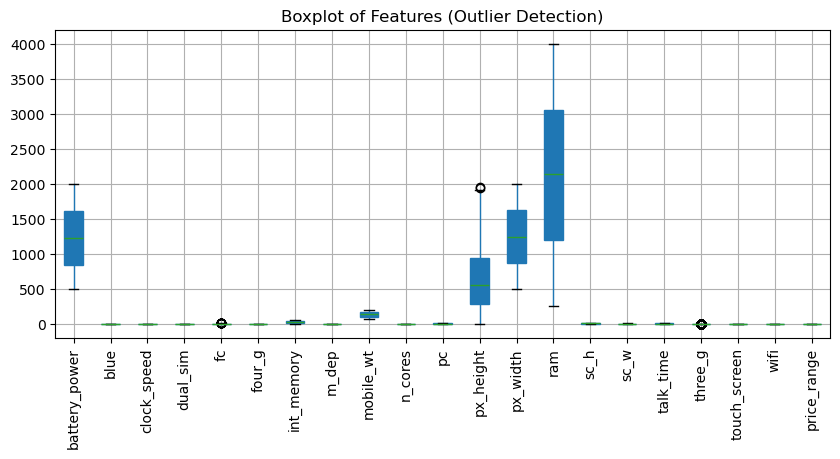

In [9]:
plt.figure(figsize=(10,4))
df.boxplot(rot=90, patch_artist=True)
plt.title("Boxplot of Features (Outlier Detection)")
plt.show()

## V. Exploratory Data Analysis (EDA)

### Count of Potability classes

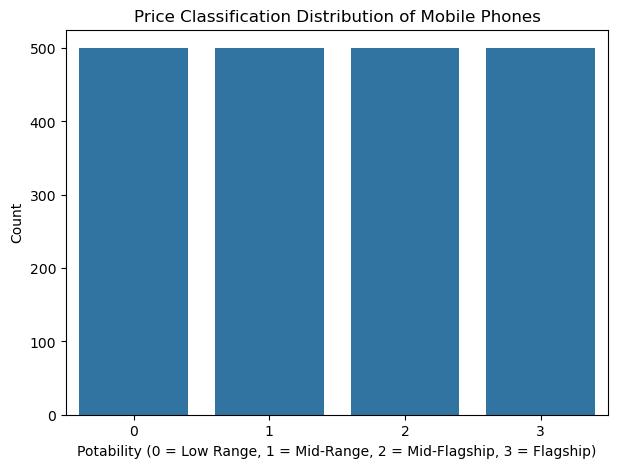

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64


In [10]:
plt.figure(figsize=(7, 5))
sns.countplot(x=df["price_range"])
plt.title("Price Classification Distribution of Mobile Phones")
plt.xlabel("Potability (0 = Low Range, 1 = Mid-Range, 2 = Mid-Flagship, 3 = Flagship)")
plt.ylabel("Count")
plt.show()

target_temp = df["price_range"].value_counts()
print(target_temp)

### Histograms for each feature

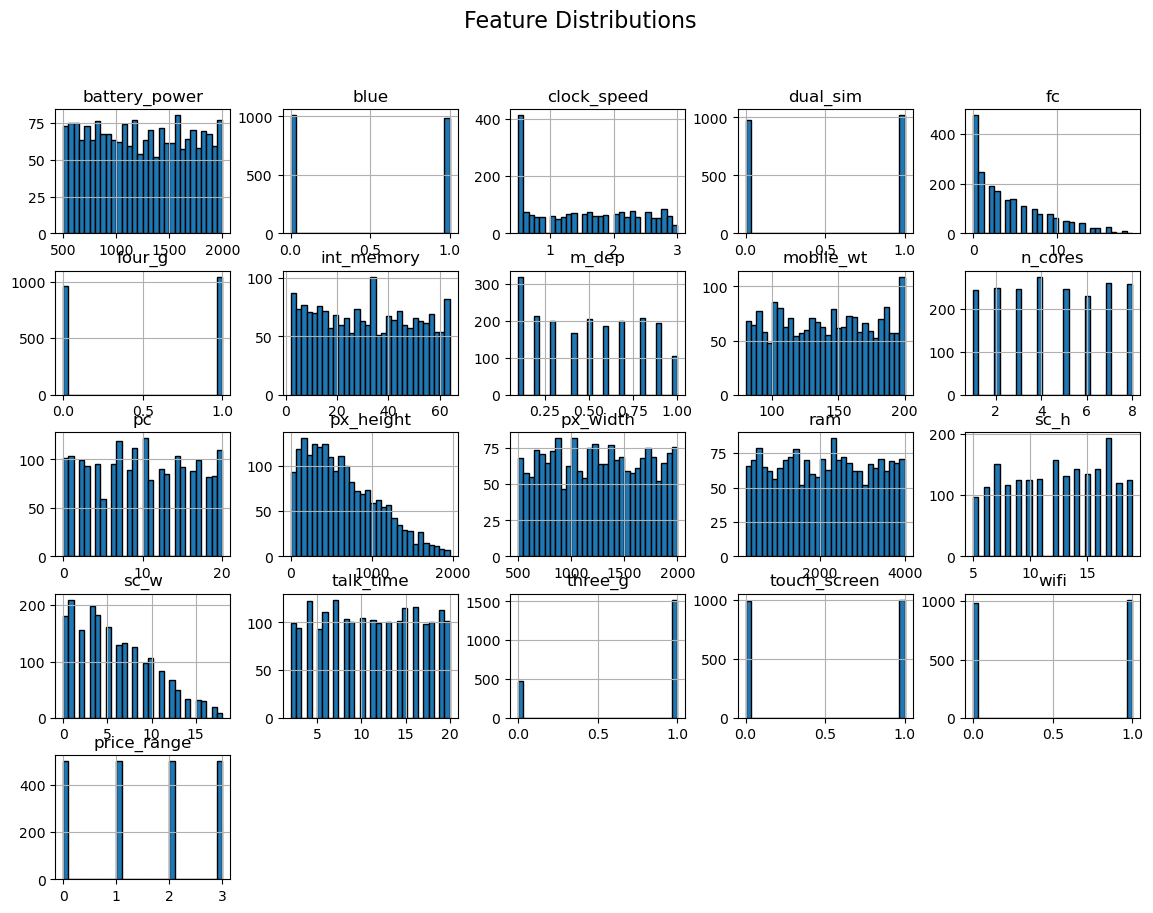

In [11]:
df.hist(figsize=(14,10), bins=30, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

### Correlation Matrix

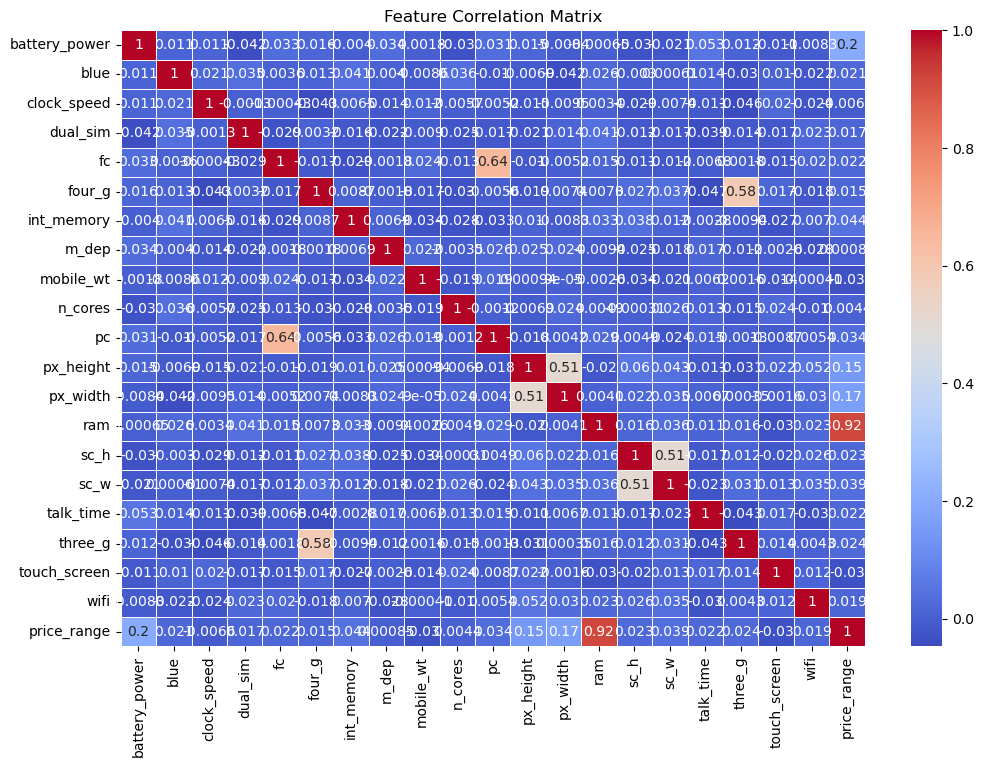

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

## VI. Train-Test split & Model Fitting

### 1. Separate features (X) and target (y)

In [13]:
X = df.drop(columns=['price_range'])  
y = df['price_range']  

### 2. Split the dataset into training and testing sets (80% train, 20% test)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. Train the Random Forest Classifier

In [15]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### 4. Make predictions on the test set

In [16]:
y_pred = rf_model.predict(X_test)

### 5. Confusion Matrix

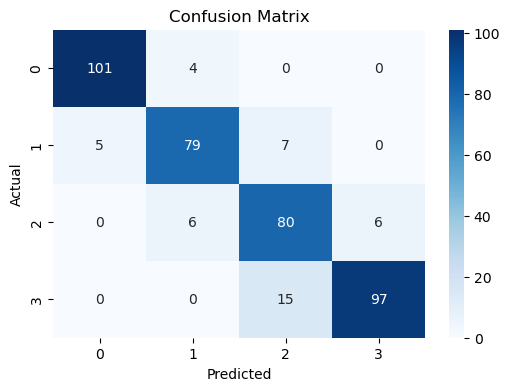

In [17]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [18]:
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 0.1075
Root Mean Squared Error (RMSE): 0.32787192621510003
Mean Absolute Error (MAE): 0.1075


### 6. Classification Report

In [19]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.89      0.87      0.88        91
           2       0.78      0.87      0.82        92
           3       0.94      0.87      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



### 7. Saving the Model

In [20]:
import pickle

In [21]:
with open('mobile_price_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

### 8. Loading the model 

In [22]:
with open('mobile_price_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [23]:
t_df = pd.read_csv("test.csv")

In [24]:
t_df

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


### Shape of Our Dataset (Number of Rows And Number of Columns)

In [25]:
t_df.shape

(1000, 21)

### Basic Information of our Dataset

In [26]:
t_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [28]:
t_df = t_df.drop(t_df.columns[0], axis=1)  # Drops the first column

In [29]:
t_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


### 9. Testing model with test dataset

In [30]:
X_test = t_df

In [33]:
predictions = loaded_model.predict(X_test)

print(predictions)

[3 3 2 3 1 3 3 1 3 0 3 3 0 0 2 0 2 1 3 2 1 3 1 1 3 0 2 0 2 0 2 0 3 0 1 1 3
 1 2 1 1 2 0 0 0 1 0 2 1 2 1 0 3 0 3 1 3 1 1 3 3 3 0 1 1 1 1 2 1 2 1 2 2 3
 3 0 2 0 2 3 0 3 3 0 3 0 3 1 3 0 1 1 2 0 2 1 0 2 1 3 1 0 0 3 1 2 1 1 2 3 3
 3 1 3 3 3 3 1 3 0 0 3 2 1 2 0 3 2 3 1 0 2 1 1 3 1 1 0 3 2 1 3 1 2 2 3 3 2
 2 3 2 3 0 0 3 2 3 3 3 3 2 2 3 3 3 3 1 0 3 0 0 0 1 1 0 1 0 0 1 2 1 0 0 1 2
 2 2 1 0 0 0 0 0 3 1 0 2 2 2 3 1 2 3 3 3 2 2 1 0 0 1 3 1 2 3 3 0 2 0 3 2 2
 3 0 0 1 0 3 0 1 0 2 2 1 3 0 2 0 3 1 2 0 0 2 1 3 2 3 1 1 3 0 0 2 3 3 1 3 1
 0 3 2 1 2 3 3 3 1 0 1 2 3 1 1 3 2 0 3 0 1 2 0 0 3 2 3 3 2 1 3 3 2 3 2 2 1
 1 0 2 3 1 0 0 3 0 3 0 1 2 0 2 3 1 3 1 2 1 2 0 0 0 1 3 2 0 0 0 3 1 0 3 3 1
 2 3 2 3 1 3 3 2 2 2 3 3 0 3 0 3 1 3 1 3 3 0 1 1 3 1 3 2 3 0 0 0 0 2 0 0 2
 1 1 2 3 2 0 1 0 0 3 2 0 3 1 2 2 1 1 3 1 1 2 2 1 2 0 1 1 0 3 2 1 0 1 0 0 1
 0 0 0 0 2 2 3 2 3 0 3 0 3 0 1 1 1 2 0 3 2 3 3 1 3 1 3 1 3 2 0 2 2 1 1 0 0
 0 1 2 1 0 3 3 0 2 3 0 0 3 1 1 0 2 2 3 0 3 0 2 3 3 3 0 2 0 2 3 0 1 1 0 0 1
 1 2 3 3 3 2 3 1 1 2 2 3 